In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import geopandas as gpd
from geopandas import GeoDataFrame
from mpl_toolkits.axes_grid1 import make_axes_locatable

# We are going to use a couple classes to manage our data and methods
import sys
sys.path.insert(1, '../src')
from classes import data, data_un_Agg
# until I integrate into class, use this for scatter plots:
from functions import scatter, plot_subgroup_hist

%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
plt.style.use('seaborn-white')

# for testing
%load_ext autoreload
%autoreload 2

In [52]:
full_data = pd.read_csv('../data/prices_CBSA_vaca_construction_pop.csv')

/usr/local/anaconda3/envs/py377_maps/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
full_data.head()

,CBSA,NAME,LSAD,POPESTIMATE2019,ZIP,RegionName,State,City,Metro,CountyName,...,ErrorMargin4,cbsa_code,CSA,Name,Total,unit_1,2 Units,unit_34,unit_5,unit_for_5orMore
0,10420,"Akron, OH",Metropolitan Statistical Area,703479,44256,44256,OH,Medina,Cleveland-Elyria,Medina County,...,10.1000,"10,420.0000",184.0000,"Akron, OH ...",945.0000,856.0000,2.0000,32.0000,55.0000,1.0000
1,10420,"Akron, OH",Metropolitan Statistical Area,703479,44256,44256,OH,Medina,Cleveland-Elyria,Medina County,...,10.1000,"10,420.0000",184.0000,"Akron, OH ...",945.0000,856.0000,2.0000,32.0000,55.0000,1.0000
2,10420,"Akron, OH",Metropolitan Statistical Area,703479,44256,44256,OH,Medina,Cleveland-Elyria,Medina County,...,10.1000,"10,420.0000",184.0000,"Akron, OH ...",945.0000,856.0000,2.0000,32.0000,55.0000,1.0000
3,10420,"Akron, OH",Metropolitan Statistical Area,703479,44256,44256,OH,Medina,Cleveland-Elyria,Medina County,...,10.1000,"10,420.0000",184.0000,"Akron, OH ...",945.0000,856.0000,2.0000,32.0000,55.0000,1.0000
4,10420,"Akron, OH",Metropolitan Statistical Area,703479,44256,44256,OH,Medina,Cleveland-Elyria,Medina County,...,10.1000,"10,420.0000",184.0000,"Akron, OH ...",945.0000,856.0000,2.0000,32.0000,55.0000,1.0000


In [240]:
full_data.iloc[0,:]

CBSA                                                            10420
NAME                                                        Akron, OH
LSAD                                    Metropolitan Statistical Area
POPESTIMATE2019                                                703479
ZIP                                                             44256
RegionName                                                      44256
State                                                              OH
City                                                           Medina
Metro                                                Cleveland-Elyria
CountyName                                              Medina County
month_date                                                    2019-01
house_price                                              241,373.0000
rent_price                                                 1,210.0000
cbsa_title                                                  Akron, OH
Q1                  

In [54]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39756 entries, 0 to 39755
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CBSA              39756 non-null  int64  
 1   NAME              39756 non-null  object 
 2   LSAD              39756 non-null  object 
 3   POPESTIMATE2019   39756 non-null  int64  
 4   ZIP               39756 non-null  int64  
 5   RegionName        39756 non-null  int64  
 6   State             39756 non-null  object 
 7   City              39756 non-null  object 
 8   Metro             39756 non-null  object 
 9   CountyName        39756 non-null  object 
 10  month_date        39756 non-null  object 
 11  house_price       39756 non-null  float64
 12  rent_price        38901 non-null  float64
 13  cbsa_title        36672 non-null  object 
 14  Q1                36672 non-null  float64
 15  ErrorMargin1      36672 non-null  float64
 16  Q2                36672 non-null  float6

In [55]:
full_data[full_data['State'] == 'AK']

,CBSA,NAME,LSAD,POPESTIMATE2019,ZIP,RegionName,State,City,Metro,CountyName,...,ErrorMargin4,cbsa_code,CSA,Name,Total,unit_1,2 Units,unit_34,unit_5,unit_for_5orMore


In [56]:
len(full_data['State'].sort_values().unique())

43

In [57]:
full_data['State'].sort_values().unique()

array(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'MI', 'MN',
       'MO', 'MS', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI'],
      dtype=object)

In [182]:
states = set(full_data['State'].sort_values().unique())

In [183]:
states

{'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'MI',
 'MN',
 'MO',
 'MS',
 'NC',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'TN',
 'TX',
 'UT',
 'VA',
 'WA',
 'WI'}

In [175]:
# We are going to use a couple classes to manage our data and methods
import sys
sys.path.insert(1, '../src')
from classes import data, data_un_Agg, data_un_Agg_no_rent

In [58]:
dataobj = data_un_Agg(full_data, 2019)

In [59]:
agg_zip = dataobj.agg_by_zip()

In [62]:
agg_zip = agg_zip.df

In [80]:
agg_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CBSA                3313 non-null   object 
 1   CBSA_type           3313 non-null   object 
 2   CBSA_name           3313 non-null   object 
 3   zip_code            3313 non-null   object 
 4   state               3313 non-null   object 
 5   house_price         3313 non-null   float64
 6   house_priceSD       3313 non-null   float64
 7   rent_price          3311 non-null   float64
 8   rent_priceSD        3310 non-null   float64
 9   rent_priceN         3313 non-null   int64  
 10  pop_2019_est        3313 non-null   int64  
 11  vacancy_pct         3056 non-null   float64
 12  construction_19_Q2  3056 non-null   float64
 13  rent_pct            3311 non-null   float64
 14  rent_CV             3310 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 388.4+

In [83]:
agg_zip = agg_zip.dropna(subset=['rent_price'], axis=0).reset_index()

In [84]:
agg_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3311 entries, 0 to 3310
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               3311 non-null   int64  
 1   CBSA                3311 non-null   object 
 2   CBSA_type           3311 non-null   object 
 3   CBSA_name           3311 non-null   object 
 4   zip_code            3311 non-null   object 
 5   state               3311 non-null   object 
 6   house_price         3311 non-null   float64
 7   house_priceSD       3311 non-null   float64
 8   rent_price          3311 non-null   float64
 9   rent_priceSD        3310 non-null   float64
 10  rent_priceN         3311 non-null   int64  
 11  pop_2019_est        3311 non-null   int64  
 12  vacancy_pct         3054 non-null   float64
 13  construction_19_Q2  3054 non-null   float64
 14  rent_pct            3311 non-null   float64
 15  rent_CV             3310 non-null   float64
dtypes: flo

In [166]:
from sklearn.linear_model import LinearRegression, LassoLarsIC, Ridge, RidgeCV, Lasso, LassoCV, ElasticNetCV
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import probplot

In [96]:
def prediction(df, cols, y, split=0.25):
    '''
    inputs df, cols of predictors, and y response
    runs model
    returns model, residuals, yhat, X_train, y_train, X_test, y_test
    '''
    # default here is 25% in test
    X_train, X_test, y_train, y_test = train_test_split(df[cols].to_numpy().reshape(-1, 1), y, test_size=split) # split to test model
    model = LinearRegression() # instantiate instance of class
    model.fit(X_train, y_train) # fit model
    yhat = model.predict(X_test) # use new data in X_test to predict y_test
    residuals = y_test - yhat # calc residuals between model and actualy (y_test)
    return model, residuals, yhat, X_train, y_train, X_test, y_test

In [204]:
# discard outlier rents over $3k
agg_zip = agg_zip[agg_zip['rent_price'] < 3500]
agg_zip = agg_zip[agg_zip['house_price'] < 1_000_000]

In [205]:
agg_zip['house_price'].max()

999233.0

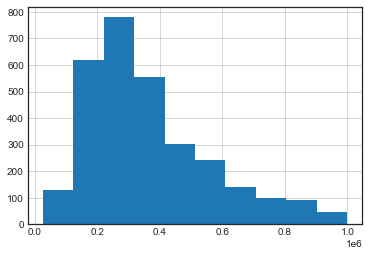

In [206]:
agg_zip['house_price'].hist()

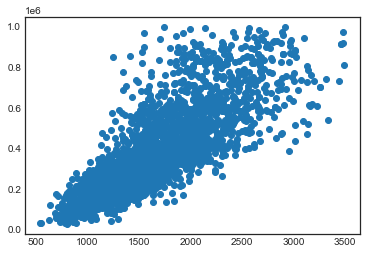

In [207]:
plt.scatter(agg_zip['rent_price'], agg_zip['house_price'])

In [250]:
y = agg_zip['rent_price'].to_numpy()

In [209]:
model, residuals, yhat, X_train, y_train, X_test, y_test = prediction(agg_zip, 'house_price', y, split=0.25)

In [255]:
agg_zip[['pop_2019_est', 'house_price']].to_numpy().shape

(3003, 2)

In [269]:
X_train, X_test, y_train, y_test = train_test_split(agg_zip[['pop_2019_est', 'house_price']].to_numpy(), agg_zip[['rent_price']], test_size=0.25) # split to test model
model_with_pop = LinearRegression() # instantiate instance of class
model_with_pop.fit(X_train, y_train) # fit model
yhat = model_with_pop.predict(X_test) # use new data in X_test to predict y_test
residuals = y_test - yhat # calc residuals between model and actualy (y_test)

In [270]:
explained_variance, mse, r2, adj_r2 = get_stats(X_test, y_test, yhat)

explained_variance: 0.6588
r2: 0.6586
adj. r2: 0.6577
MSE: 76144.926
RMSE: 275.9437


In [274]:
residuals2 = residuals.to_numpy()

In [284]:
residuals2 = residuals2.reshape(1,-1)

In [288]:
new_states['house_price'].to_numpy().reshape(-1,1)

array([[170557.33333333],
       [200517.        ],
       [226508.33333333],
       ...,
       [132395.83333333],
       [185360.58333333],
       [179675.33333333]])

In [289]:
new_states_rent_predict_pop = model_with_pop.predict(new_states[['pop_2019_est', 'house_price']].to_numpy())

In [292]:
new_states_rent_predict = new_states.copy()

In [294]:
new_states_rent_predict['rent_price_predict'] = new_states_rent_predict_pop

In [296]:
new_states_rent_predict['rent_pct'] = new_states_rent_predict['rent_price_predict'] / new_states_rent_predict['house_price']

In [297]:
new_states_rent_predict.head()

,CBSA,CBSA_type,CBSA_name,zip_code,state,house_price,house_priceSD,pop_2019_est,predicted_rent,rent_pct,rent_price_predict
0,10100,Micropolitan Statistical Area,"Aberdeen, SD",57401,SD,"170,557.3333",813.8851,42668,"1,274.7566",0.0071,"1,219.0526"
1,10100,Micropolitan Statistical Area,"Aberdeen, SD",57426,SD,"200,517.0000","4,954.6172",42668,"1,331.4446",0.0063,"1,270.8753"
2,10100,Micropolitan Statistical Area,"Aberdeen, SD",57427,SD,"226,508.3333","1,669.6043",42668,"1,380.6240",0.0058,"1,315.8337"
3,10100,Micropolitan Statistical Area,"Aberdeen, SD",57428,SD,"65,125.6667","1,323.5861",42668,"1,075.2647",0.0159,"1,036.6823"
4,10100,Micropolitan Statistical Area,"Aberdeen, SD",57432,SD,"115,267.5833","2,208.7741",42668,"1,170.1404",0.0097,"1,123.4152"


In [301]:
new_states_rent_predict.to_csv('../data/new_states_rent_predict_v3.tsv', sep='\t')

In [298]:
def plot_resid(residuals):
    '''
    input is predicted y and residuals
    returns residual plot
    '''
    fig, ax = plt.subplots(1,1, figsize=(10,8))
    x = np.linspace(0, 1, len(residuals)) # make it the same size
    ax.scatter(x, residuals)
    ax.axhline(0, linestyle ='--')
    #ax.set_xlabel('y predicted HIV diagnoses', size=16)
    ax.set_ylabel('residuals (y observed - y predicted)', size=16)
    ax.set_title('residual plot', size=18)
    #ax.set_ylim((-200,500))
    #plt.savefig('../images/residuals.png')
    return fig, ax

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc08cfa6ed0>)

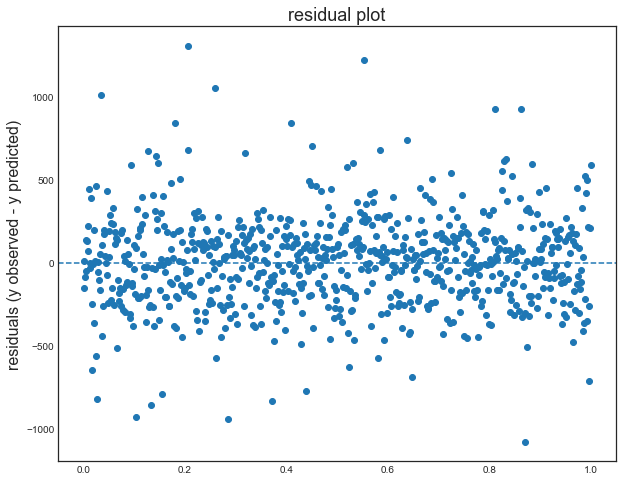

In [300]:
plot_resid(residuals)

In [210]:
def get_stats(X_test, y_true, y_pred):
    '''
    inputs X, y actual and y predicted
    returns useful stats for linear models
    '''
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred) 
    r2 = metrics.r2_score(y_true, y_pred)
    # train.shape[0] is n and # train.shape[1] is p (features or predictors)
    adj_r2 = (1 - (1 - r2) * ((X_test.shape[0] - 1) / 
          (X_test.shape[0] - X_test.shape[1] - 1)))
    print(f'explained_variance: {round(explained_variance, 4)}') 
    print(f'r2: {round(r2,4)}')
    print(f'adj. r2: {round(adj_r2,4)}')
    print(f'MSE: {round(mse,4)}')
    print(f'RMSE: {round(np.sqrt(mse),4)}') # in units of data
    return explained_variance, mse, r2, adj_r2

In [211]:
explained_variance, mse, r2, adj_r2 = get_stats(X_test, y_test, yhat)

explained_variance: 0.6213
r2: 0.6206
adj. r2: 0.6201
MSE: 86372.0359
RMSE: 293.8912


In [212]:
def qqplot(residuals):
    '''
    inputs residuals vector
    returns qqplot
    '''
    fig, ax = plt.subplots(1,1, figsize=(10,8))
    probplot(residuals, dist="norm", plot=ax)
    #ax.set_xlabel('y predicted HIV diagnoses', size=16)
    ax.set_ylabel('observed', size=16)
    ax.set_title('qqplot', size=18)
    #ax.set_ylim((-200,500))
    #plt.savefig('../images/residuals.png')
    return fig, ax

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc0819f63d0>)

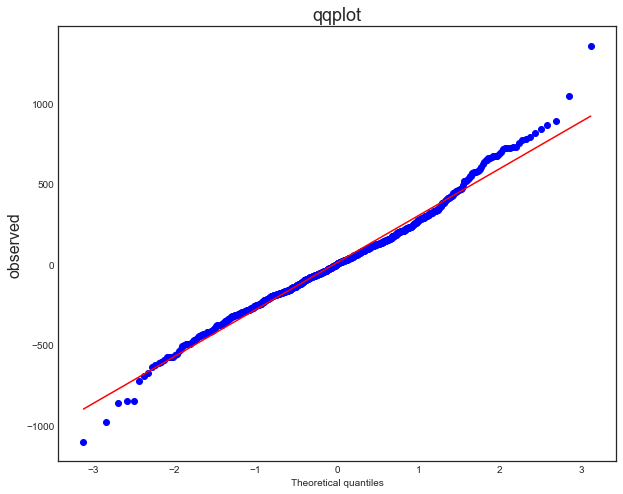

In [213]:
qqplot(residuals)

In [135]:
def plot_resid_fitted(yhat, residuals):
    '''
    input is predicted y and residuals
    returns residual plot
    '''
    fig, ax = plt.subplots(1,1, figsize=(10,8))
    ax.scatter(yhat, residuals)
    ax.axhline(0, linestyle ='--')
    #ax.set_xlabel('y predicted HIV diagnoses', size=16)
    ax.set_ylabel('residuals (y observed - y predicted)', size=16)
    ax.set_title('residual plot', size=18)
    #ax.set_ylim((-200,500))
    #plt.savefig('../images/residuals.png')
    return fig, ax

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc081c38dd0>)

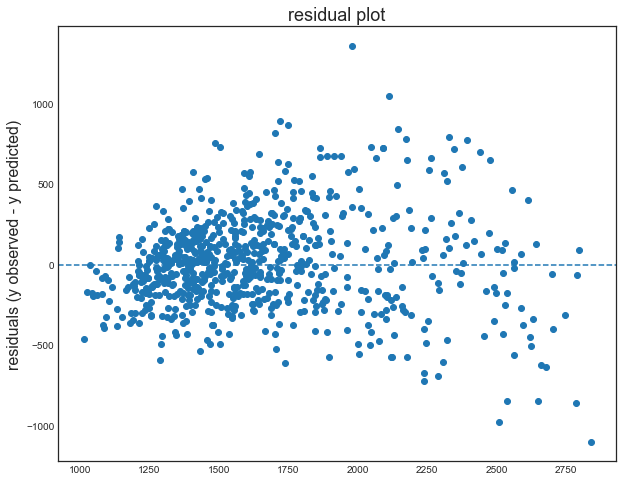

In [214]:
plot_resid_fitted(yhat, residuals)

In [223]:
new_states

,CBSA,CBSA_type,CBSA_name,zip_code,state,house_price,house_priceSD,pop_2019_est
0,10100,Micropolitan Statistical Area,"Aberdeen, SD",57401,SD,"170,557.3333",813.8851,42668
1,10100,Micropolitan Statistical Area,"Aberdeen, SD",57426,SD,"200,517.0000","4,954.6172",42668
2,10100,Micropolitan Statistical Area,"Aberdeen, SD",57427,SD,"226,508.3333","1,669.6043",42668
3,10100,Micropolitan Statistical Area,"Aberdeen, SD",57428,SD,"65,125.6667","1,323.5861",42668
4,10100,Micropolitan Statistical Area,"Aberdeen, SD",57432,SD,"115,267.5833","2,208.7741",42668
...,...,...,...,...,...,...,...,...
28627,49460,Micropolitan Statistical Area,"Yankton, SD",57063,SD,"160,487.0833","2,219.7996",22814
28628,49460,Micropolitan Statistical Area,"Yankton, SD",57067,SD,"166,658.2500","2,393.5860",22814
28629,49460,Micropolitan Statistical Area,"Yankton, SD",57070,SD,"132,395.8333",795.7747,22814
28630,49460,Micropolitan Statistical Area,"Yankton, SD",57072,SD,"185,360.5833","1,723.8656",22814


In [225]:
new_states_rent_predict = model.predict(new_states['house_price'].to_numpy().reshape(-1,1))

In [227]:
new_states_rent_predict.min()

979.6392254125036

In [232]:
new_states['predicted_rent'] = new_states_rent_predict

/usr/local/anaconda3/envs/py377_maps/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [233]:
new_states.head()

,CBSA,CBSA_type,CBSA_name,zip_code,state,house_price,house_priceSD,pop_2019_est,predicted_rent
0,10100,Micropolitan Statistical Area,"Aberdeen, SD",57401,SD,"170,557.3333",813.8851,42668,"1,274.7566"
1,10100,Micropolitan Statistical Area,"Aberdeen, SD",57426,SD,"200,517.0000","4,954.6172",42668,"1,331.4446"
2,10100,Micropolitan Statistical Area,"Aberdeen, SD",57427,SD,"226,508.3333","1,669.6043",42668,"1,380.6240"
3,10100,Micropolitan Statistical Area,"Aberdeen, SD",57428,SD,"65,125.6667","1,323.5861",42668,"1,075.2647"
4,10100,Micropolitan Statistical Area,"Aberdeen, SD",57432,SD,"115,267.5833","2,208.7741",42668,"1,170.1404"


In [236]:
new_states['rent_pct'] = new_states['predicted_rent'] / new_states['house_price']

/usr/local/anaconda3/envs/py377_maps/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [241]:
new_states.to_csv('../data/rent_predictions_v2.tsv', sep='\t')

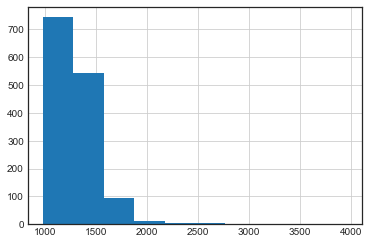

In [235]:
new_states['predicted_rent'].hist()

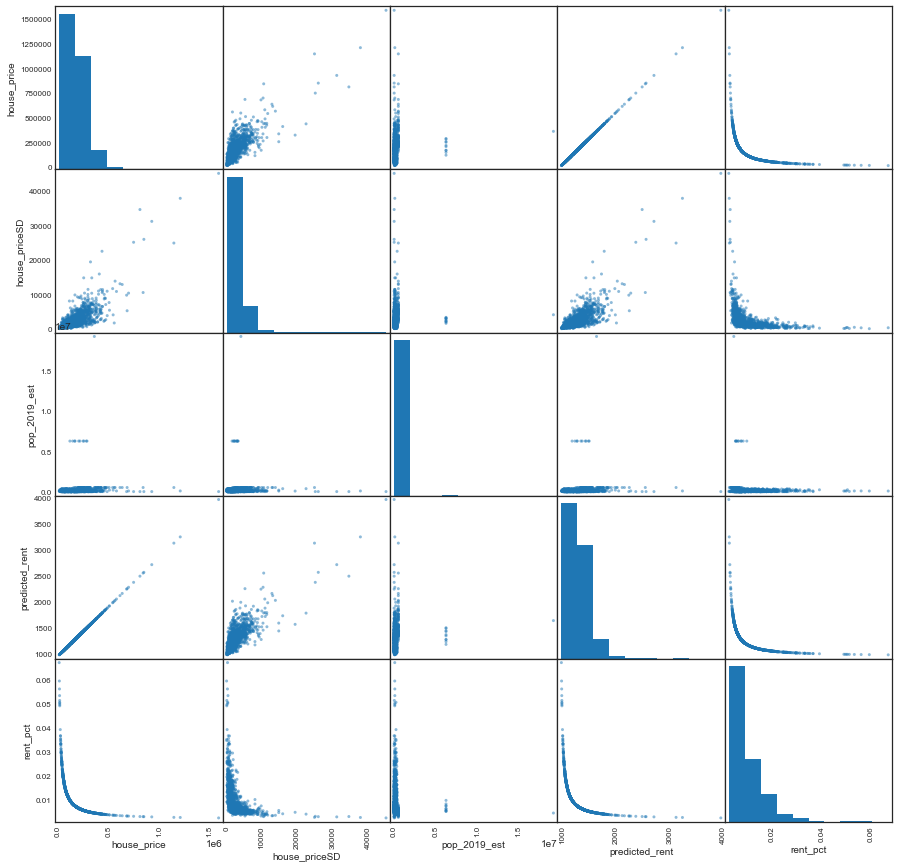

In [248]:
# what about with pop and house prices
pd.plotting.scatter_matrix(new_states, figsize=(15,15));

In [137]:
from scipy.stats import boxcox

In [155]:
y_bc, y_lamb = boxcox(y)

In [158]:
y_bc

array([ 9.05710686,  9.63765446,  9.99711351, ..., 10.11496751,
        9.47476505,  9.78342346])

In [203]:
lamb

0.22703423641829498

In [159]:
x_bc, lamb = boxcox(agg_zip['house_price'])

In [160]:
x_bc

array([59.50028065, 69.40499544, 70.7471768 , ..., 70.59513402,
       75.89978471, 68.60791883])

In [145]:
type(x_bc)

numpy.ndarray

In [146]:
x_bc.shape

(3003,)

In [147]:
y.shape

(3003,)

In [148]:
def prediction_arrays(x, y, split=0.25):
    '''
    inputs df, cols of predictors, and y response
    runs model
    returns model, residuals, yhat, X_train, y_train, X_test, y_test
    '''
    # default here is 25% in test
    X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size=split) # split to test model
    model = LinearRegression() # instantiate instance of class
    model.fit(X_train, y_train) # fit model
    yhat = model.predict(X_test) # use new data in X_test to predict y_test
    residuals = y_test - yhat # calc residuals between model and actualy (y_test)
    return model, residuals, yhat, X_train, y_train, X_test, y_test

In [161]:
model, residuals, yhat, X_train, y_train, X_test, y_test = prediction_arrays(x_bc, y_bc)

In [162]:
explained_variance, mse, r2, adj_r2 = get_stats(X_test, y_test, yhat)

explained_variance: 0.6617
r2: 0.6616
adj. r2: 0.6612
MSE: 0.093
RMSE: 0.305


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc0936f1cd0>)

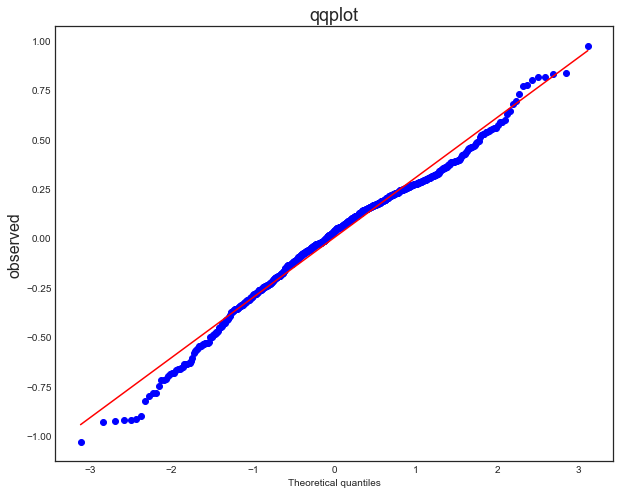

In [163]:
qqplot(residuals)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc0928d1d50>)

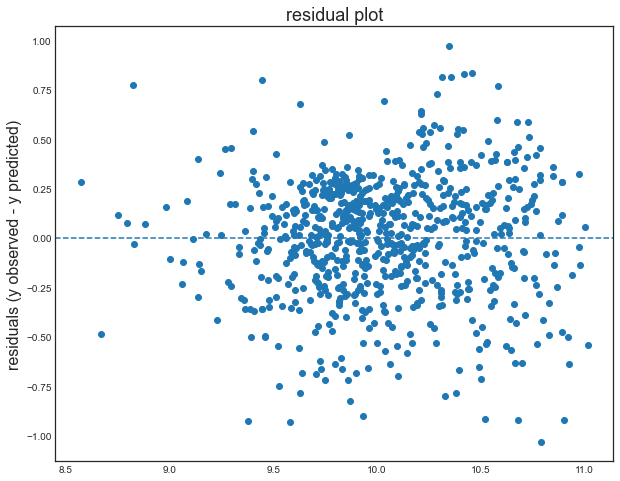

In [164]:
plot_resid_fitted(yhat, residuals)

In [171]:
cross_val_model = LinearRegression() 
result = cross_validate(cross_val_model, x_bc.reshape(-1, 1), y_bc) 

In [172]:
result['test_score'].mean()

0.6394337003214531

In [216]:
predict_data = pd.read_csv('../data/HOUSE_prices_CBSA_vaca_construction_pop.csv')

/usr/local/anaconda3/envs/py377_maps/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (12,18,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [217]:
dataobj = data_un_Agg_no_rent(predict_data, 2019)

In [218]:
predict_agg_zip = dataobj.agg_by_zip()

In [219]:
predict_agg_zip.df

,CBSA,CBSA_type,CBSA_name,zip_code,state,house_price,house_priceSD,pop_2019_est
0,10100,Micropolitan Statistical Area,"Aberdeen, SD",57401,SD,"170,557.3333",813.8851,42668
1,10100,Micropolitan Statistical Area,"Aberdeen, SD",57426,SD,"200,517.0000","4,954.6172",42668
2,10100,Micropolitan Statistical Area,"Aberdeen, SD",57427,SD,"226,508.3333","1,669.6043",42668
3,10100,Micropolitan Statistical Area,"Aberdeen, SD",57428,SD,"65,125.6667","1,323.5861",42668
4,10100,Micropolitan Statistical Area,"Aberdeen, SD",57432,SD,"115,267.5833","2,208.7741",42668
...,...,...,...,...,...,...,...,...
28821,49820,Micropolitan Statistical Area,"Zapata, TX",78067,TX,"64,166.7500",532.7244,14179
28822,49820,Micropolitan Statistical Area,"Zapata, TX",78076,TX,"98,828.2500",822.1900,14179
28823,49820,Micropolitan Statistical Area,"Zapata, TX",78361,TX,"121,207.8333","3,167.1187",14179
28824,49820,Micropolitan Statistical Area,"Zapata, TX",78564,TX,"81,951.0000","1,301.7502",14179


In [220]:
predict_agg_zip.df['state'].sort_values().unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [221]:
# sort for states not in the fit set
predict_agg_zip_df = predict_agg_zip.df
new_states = predict_agg_zip_df[~predict_agg_zip_df['state'].isin(states)]

In [222]:
new_states.head()

,CBSA,CBSA_type,CBSA_name,zip_code,state,house_price,house_priceSD,pop_2019_est
0,10100,Micropolitan Statistical Area,"Aberdeen, SD",57401,SD,"170,557.3333",813.8851,42668
1,10100,Micropolitan Statistical Area,"Aberdeen, SD",57426,SD,"200,517.0000","4,954.6172",42668
2,10100,Micropolitan Statistical Area,"Aberdeen, SD",57427,SD,"226,508.3333","1,669.6043",42668
3,10100,Micropolitan Statistical Area,"Aberdeen, SD",57428,SD,"65,125.6667","1,323.5861",42668
4,10100,Micropolitan Statistical Area,"Aberdeen, SD",57432,SD,"115,267.5833","2,208.7741",42668


In [188]:
new_states_bc, _ = boxcox(new_states['house_price'])

In [190]:
new_states_bc_rent_predict = model.predict(new_states_bc.reshape(-1,1))

In [192]:
new_states_bc_rent_predict.shape

(1404,)

In [193]:
new_states.shape

(1404, 8)

In [196]:
_

0.18241529793659156

In [197]:
# transform back to original units
from scipy.special import inv_boxcox
y_pred_rent = inv_boxcox(new_states_bc_rent_predict, _)

In [199]:
y_pred_rent.max()

277.9136299018811

In [200]:
new_states['predicted_rent'] = y_pred_rent

/usr/local/anaconda3/envs/py377_maps/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [201]:
new_states.head()

,CBSA,CBSA_type,CBSA_name,zip_code,state,house_price,house_priceSD,pop_2019_est,predicted_rent
0,10100,Micropolitan Statistical Area,"Aberdeen, SD",57401,SD,"170,557.3333",813.8851,42668,187.4166
1,10100,Micropolitan Statistical Area,"Aberdeen, SD",57426,SD,"200,517.0000","4,954.6172",42668,192.0259
2,10100,Micropolitan Statistical Area,"Aberdeen, SD",57427,SD,"226,508.3333","1,669.6043",42668,195.6515
3,10100,Micropolitan Statistical Area,"Aberdeen, SD",57428,SD,"65,125.6667","1,323.5861",42668,164.1598
4,10100,Micropolitan Statistical Area,"Aberdeen, SD",57432,SD,"115,267.5833","2,208.7741",42668,177.1475


In [202]:
new_states.to_csv('../data/rent_predictions_v1.csv')